## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import warnings
warnings.simplefilter('ignore')

# Wine

屬於 multi-class 分類問題。

[資料說明](https://scikit-learn.org/stable/datasets/index.html#wine-dataset)

In [110]:
# 讀取資料集
wine = datasets.load_wine()

# 資料特徵
X = pd.DataFrame(wine.data, columns = wine.feature_names)
print('形狀：', X.shape)
X.head()

形狀： (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [111]:
# 目標值
Y = pd.DataFrame(wine.target, columns = ['target'])
print('形狀：', Y.shape)
print('值：', Y['target'].unique())

形狀： (178, 1)
值： [0 1 2]


In [112]:
# 切分資料
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

# 訓練模型
model = LogisticRegression()
model.fit(X_train, Y_train)

# 預測結果
Y_pred = model.predict(X_test)
print('Accuracy: %.12f' % accuracy_score(Y_test, Y_pred))

Accuracy: 1.000000000000


# Boston

屬於回歸問題。

[資料說明](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

In [113]:
# 讀取資料
boston = datasets.load_boston()

# 資料特徵
X = pd.DataFrame(boston.data, columns = boston.feature_names)
print('形狀：', X.shape)
X.head()

形狀： (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [114]:
# 目標值
Y = pd.DataFrame(boston.target, columns = ['target'])
print('形狀：', Y.shape)
Y.describe()

形狀： (506, 1)


,target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [115]:
# 切分資料
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=0)

# 訓練模型
model = LinearRegression()
model.fit(X_train, Y_train)

# 預測結果
Y_pred = model.predict(X_test)
print('R2: %.12f' % r2_score(Y_test, Y_pred))
print('MSE: %.12f' % mean_squared_error(Y_test, Y_pred))

R2: 0.667189349437
MSE: 25.918239404796


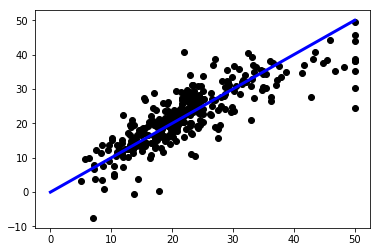

In [116]:
plt.scatter(Y_test, Y_pred,  color='black')
plt.plot([0, Y.max()], [0, Y.max()], color='blue', linewidth=3)
plt.show()

# Breast cancer wisconsin

屬於分類問題。

[資料說明](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)

In [117]:
# 讀取資料集
breast_cancer = datasets.load_breast_cancer()

# 資料特徵
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
print('形狀：', X.shape)
X.head()

形狀： (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [118]:
# 目標值
Y = pd.DataFrame(breast_cancer.target, columns = ['target'])
print('形狀：', Y.shape)
print('值：', Y['target'].unique())

形狀： (569, 1)
值： [0 1]


In [119]:
# 切分資料
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 訓練模型
model = LogisticRegression()
model.fit(X_train, Y_train)

# 預測結果
Y_pred = model.predict(X_test)
print('Accuracy: %.12f' % accuracy_score(Y_test, Y_pred))

Accuracy: 0.964912280702
